In [11]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
insurance  = pd.read_csv("https://raw.githubusercontent.com/SahilChachra/Medical-Cost-Prediction/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
#one hot encode
insurence_one_hot = pd.get_dummies(insurance)
insurence_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [14]:
x=insurence_one_hot.drop("charges",axis=1)
y=insurence_one_hot["charges"]
x.head(),y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0        True     False      False        True   
 1   18  33.770         1       False      True       True       False   
 2   28  33.000         3       False      True       True       False   
 3   33  22.705         0       False      True       True       False   
 4   32  28.880         0       False      True       True       False   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0             False             False             False              True  
 1             False             False              True             False  
 2             False             False              True             False  
 3             False              True             False             False  
 4             False              True             False             False  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [33]:
x_train, y_train

(      age     sex     bmi  children smoker     region
 560    46  female  19.950         2     no  northwest
 1285   47  female  24.320         0     no  northeast
 1142   52  female  24.860         0     no  southeast
 969    39  female  34.320         5     no  southeast
 486    54  female  21.470         3     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1095   18  female  31.350         4     no  northeast
 1130   39  female  23.870         5     no  southeast
 1294   58    male  25.175         0     no  northeast
 860    37  female  47.600         2    yes  southwest
 1126   55    male  29.900         0     no  southwest
 
 [1070 rows x 6 columns],
 560      9193.83850
 1285     8534.67180
 1142    27117.99378
 969      8596.82780
 486     12475.35130
            ...     
 1095     4561.18850
 1130     8582.30230
 1294    11931.12525
 860     46113.51100
 1126    10214.63600
 Name: charges, Length: 1070, dtype: float64)

In [27]:
tf.random.set_seed(42)
model_ins = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_ins.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["mae"])
history = model_ins.fit(x_train,y_train,epochs=500,verbose=0)

ValueError: Invalid dtype: object

In [11]:
model_ins.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3220.2783 - mae: 3220.2783  


[3175.841064453125, 3175.841064453125]

Text(0.5, 0, 'epochs')

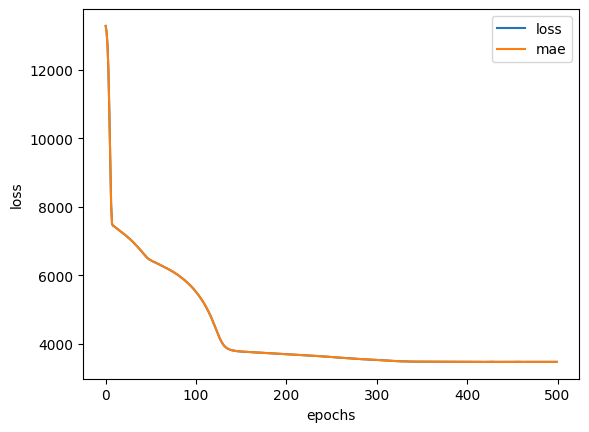

In [12]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [18]:
#Normalization and standardization
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
insurance  = pd.read_csv("https://raw.githubusercontent.com/SahilChachra/Medical-Cost-Prediction/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
# Create column transformer
ct=make_column_transformer((MinMaxScaler(),["age","bmi","children"]),
                            (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]))
# Xand Y
x=insurance.drop("charges",axis=1)
y=insurance["charges"]

#train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#fit and transform
ct.fit(x_train)
#transform training and test with norma
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)


In [21]:
model_ch = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

model_ch.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["mae"])

history = model_ch.fit(x_train_normal,y_train,epochs=500)


Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12683.2930 - mae: 12683.2930
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12675.0732 - mae: 12675.0732
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12654.5908 - mae: 12654.5908
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12610.8467 - mae: 12610.8467 
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12532.7930 - mae: 12532.7930
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12409.7949 - mae: 12409.7949
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12231.3965 - mae: 12231.3965
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11987.5762 - mae: 11987.5762 
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11668.6211 - mae: 11668.6211
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11268.6201 - mae: 11268.6201
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10794.2715 - mae: 10794.2715
Epoch 12/500
34/34 ━━━━━━━━━

In [22]:
model_ch.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

In [23]:
model_ch.evaluate(x_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3209.0813 - mae: 3209.0813  


[3159.17919921875, 3159.17919921875]

Text(0.5, 0, 'epoch')

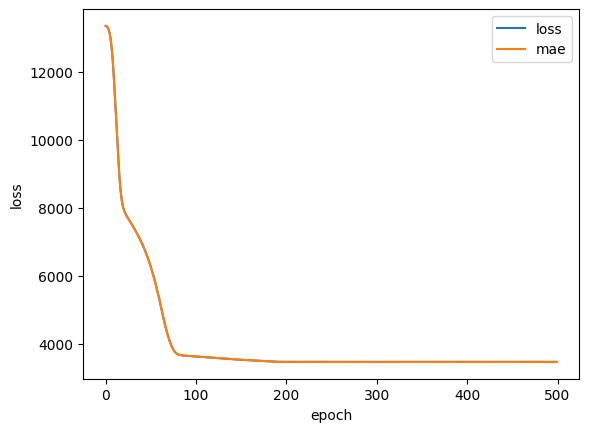

In [24]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epoch")